#Descripci√≥n
Se realiz√≥ una modelo predictivo basado en la regresi√≥n para calcular el precio de una vivienda funci√≥n de las distintas variables del dataset, con el fin de eligir el modelo que mejor se adapte seg√∫n las m√©tricas analizadas.

Se plantea 3 escenarios hipot√©ticos para poder comparar el escenario m√°s √≥ptimo.

Para el proyecto, se utiliz√≥ el siguiente dataset p√∫blico que encontramos en Kaggle. https://www.kaggle.com/shree1992/housedata

**Objetivo del proyecto**: Con el presente proyecto se pretende ser capaz de realizar un an√°lisis exploratorio de un dataset, y realizar un modelo de regresi√≥n que permita predecir el precio de la vivienda.

#Fase 1: Importaci√≥n del dataset.
Importaci√≥n desde kaggle

In [ ]:
from google.colab import files
!pip install -q kaggle

In [ ]:
#subimos kaggle.json con el cliente
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#descargamos dataset
!kaggle datasets download -d shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 71.7MB/s]


In [ ]:
#movemos fichero json a ubicacion correcta
!mv kaggle.json /root/.kaggle/kaggle.json

mv: cannot move 'kaggle.json' to '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#volvemos a cargar el dataset
!kaggle datasets download -d shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
housedata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#descomprimimos el dataset
!unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [ ]:
import pandas as pd
#creamos una variable con el conjunto de datos
data = pd . read_csv ( "./data.csv" )

#Fase 2: An√°lisis exploratorio de los datos.

##Estructura y las caracter√≠sticas del DataFrame

Es importante conocer el nombre y significado de cada variable, entonces;

*   date: fecha
*   price: precios de la propiedad
*   bedrooms: n√∫mero de dormitorios
*   bathrooms: n√∫mero de ba√±os
*   sqft_living: superficie de la casa(habitante)
*   sqft_lot: superficie del patio o solar
*   floors: n√∫mero de pisos
*   waterfront: propiedad enfrente al mar
*   view: vistas
*   condition: condiciones
*   sqft_above: superficie del √°tico
*   sqft_basement: superficie del s√≥tano
*   yr_built: a√±o de construcci√≥n
*   yr_renovated: a√±o de renovaci√≥n
*   street: calle
*   city: ciudad
*   statezip: estado
*   country: pa√≠s

In [ ]:
# exploracion de las primeras l√≠neas dataset
data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

*   El DataFrame contiene un total de 4600 filas indexadas de 0 a 4599.
*   Hay un total de 17 columnas en el DataFrame
*   El DataFrame tiene 4600 filas, y todas las filas tienen valores completos (en todas las columnas). Este dataset no contiene  filas con datos faltantes, por lo que no requiere tratamiento de datos faltantes.
*   Hay 13 columnas con datos num√©ricos (9 int64 y 4 float64)
*    Hay 5 columnas con datos categ√≥ricos(object)
*   El DataFrame ocupa aproximadamente 647 KB de memoria.
El DataFrame tiene una mezcla de datos categoricos y numerico, por lo que es necesario an√°lizar esrad√≠sticas numericas y de categorizaci√≥n.

Es importante destacar que las variables waterfront y condition, son variables c√°tegoricas, la primera es d√≠cotomica y la segunda es una variable ordinal, se puede interpretar que las condiciones de la propiedad se c√°lifica de 1 a 5. La siguiente funci√≥n las tranforma en categoricas.

In [ ]:
import numpy as np
data['waterfront'] = data['waterfront'].astype('category')
data['condition'] = data['condition'].astype('category').cat.as_ordered()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           4600 non-null   object  
 1   price          4600 non-null   float64 
 2   bedrooms       4600 non-null   float64 
 3   bathrooms      4600 non-null   float64 
 4   sqft_living    4600 non-null   int64   
 5   sqft_lot       4600 non-null   int64   
 6   floors         4600 non-null   float64 
 7   waterfront     4600 non-null   category
 8   view           4600 non-null   int64   
 9   condition      4600 non-null   category
 10  sqft_above     4600 non-null   int64   
 11  sqft_basement  4600 non-null   int64   
 12  yr_built       4600 non-null   int64   
 13  yr_renovated   4600 non-null   int64   
 14  street         4600 non-null   object  
 15  city           4600 non-null   object  
 16  statezip       4600 non-null   object  
 17  country        4600 non-null   ob

##Resumen de variables num√©ricas

In [ ]:
#consultamos datos estadisticos generales: numero de elementos, media, desviacion, valor minimo, percentiles
data.describe().transpose()

count           mean            std     min        25%  \
price          4600.0  551962.988473  563834.702547     0.0  322875.00   
bedrooms       4600.0       3.400870       0.908848     0.0       3.00   
bathrooms      4600.0       2.160815       0.783781     0.0       1.75   
sqft_living    4600.0    2139.346957     963.206916   370.0    1460.00   
sqft_lot       4600.0   14852.516087   35884.436145   638.0    5000.75   
floors         4600.0       1.512065       0.538288     1.0       1.00   
view           4600.0       0.240652       0.778405     0.0       0.00   
sqft_above     4600.0    1827.265435     862.168977   370.0    1190.00   
sqft_basement  4600.0     312.081522     464.137228     0.0       0.00   
yr_built       4600.0    1970.786304      29.731848  1900.0    1951.00   
yr_renovated   4600.0     808.608261     979.414536     0.0       0.00   

                         50%        75%         max  
price          460943.461539  654962.50  26590000.0  
bedrooms            3.000000       4.00         9.0  
bathrooms           2.250000       2.50         8.0  
sqft_living      1980.000000    2620.00     13540.0  
sqft_lot         7683.000000   11001.25   1074218.0  
floors              1.500000       2.00         3.5  
view                0.000000       0.00         4.0  
sqft_above       1590.000000    2300.00      9410.0  
sqft_basement       0.000000     610.00      4820.0  
yr_built         1976.000000    1997.00      2014.0  
yr_renovated        0.000000    1999.00      2014.0

Este resultado describe las estad√≠sticas de las columnas num√©ricas del DataFrame. Las m√©tricas incluidas son conteo (count), media (mean), desviaci√≥n est√°ndar (std), y los valores m√≠nimos (min), m√°ximos (max), y percentiles (25%, 50%, 75%).

*   price (precio de la propiedad): Tiene precio maximo de viviendda de 26,590,000; la media de los precios es 551,963
*   bedrooms(n√∫mero de dormitorios): Tiene un rango de 0 a 9 habitaciones con una media de 3 habitaciones
*   bathrooms (n√∫mero de ba√±os): Un m√°ximo de 8 ba√±os y una media de 2 ba√±os.
*   sqft_living (superficie de la casa): Con una media de 2139, un m√≠nimos de 370 y un m√°ximo de 13540.
*   floors (n√∫mero de pisos): Con un tres pisos y medio la propiedad conmas pisos y una media de un piso y medio
*   view(vistas): m√≠nimo 0 y m√°ximo 4
*   yr_built(a√±o de construcci√≥n): La prpiedad mas vieja contruida fue en 1900, y las mas reciente en 2014
*   yr_renovated(a√±o de renovaci√≥n): Presenta una distribuci√≥n confusa debido a los datos mal registrados en el conjunto de datos. M√°s del 50% de los registros carecen de informaci√≥n sobre a√±o de renovaci√≥n, por lo que esta variable podr√≠a ser transformada o excluida del modelo para evitar alterar los resultados o generar confusi√≥n. Una transformaci√≥n sugerida ser√≠a convertirla en una variable categ√≥rica y dicot√≥mica, indicando √∫nicamente si ha sido renovada o no.


##Resumen de variables categ√≥ricas

In [ ]:
data.describe(include=['object','category']).transpose()

count unique                    top  freq
date        4600     70    2014-06-23 00:00:00   142
waterfront  4600      2                      0  4567
condition   4600      5                      3  2875
street      4600   4525  2520 Mulberry Walk NE     4
city        4600     44                Seattle  1573
statezip    4600     77               WA 98103   148
country     4600      1                    USA  4600

Este resultado muestra m√©tricas espec√≠ficas de las variables categ√≥ricas, como el conteo (count), n√∫mero de valores √∫nicos (unique), valor m√°s frecuente (top), y su frecuencia (freq).
*   waterfront (vista al mar): Tiene solo dos valores √∫nicos. El valor m√°s frecuente es 0, lo que indica que la mayor√≠a de las propiedades no tienen vista al mar; √∫nicamente 33 propiedades cuentan con vista al mar.
*   condition (condiciones): Presenta cinco valores √∫nicos, siendo 3 el valor m√°s frecuente, con 2875 propiedades en esta categor√≠a.
*   Todas las propiedades est√°n ubicadas en los Estados Unidos



In [ ]:
#consultamos si tenemos celdas sin valor
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

##Exploraci√≥n Visual

###Gr√°ficos de pastel

In [ ]:
import matplotlib.pyplot as plp
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
conteo = pd.Series(data['waterfront']).value_counts()

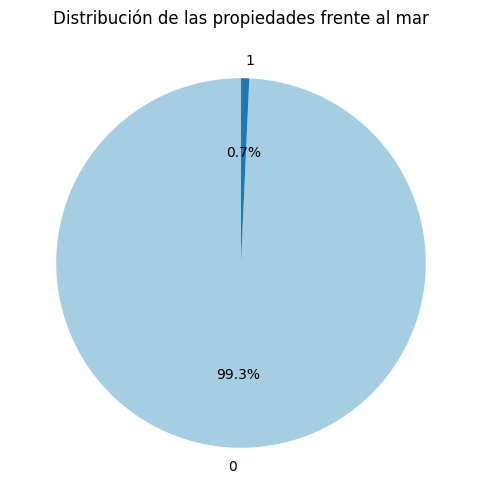

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90,colors=plt.cm.Paired.colors)
plt.title('Distribuci√≥n de las propiedades frente al mar')
plt.show()

In [ ]:
conteoc = pd.Series(data['condition']).value_counts()
colors = ['teal','#4F6272', '#B7C3F3','#DD7596', '#8EB897']

fig = go.Figure(data=[go.Pie(labels=conteoc.index, values=conteoc)])
fig.update_layout(title_text="Distribuci√≥n de las propiedades seg√∫n su condici√≥n")
fig.show()

###Gr√°ficos de barras

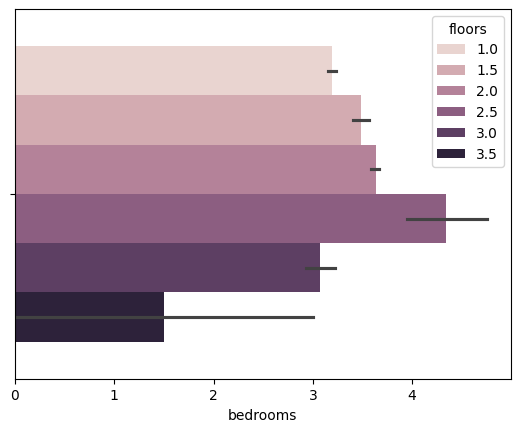

In [ ]:
sns.barplot(data=data, x='bedrooms', hue='floors')
plt.title('')
plt.show()

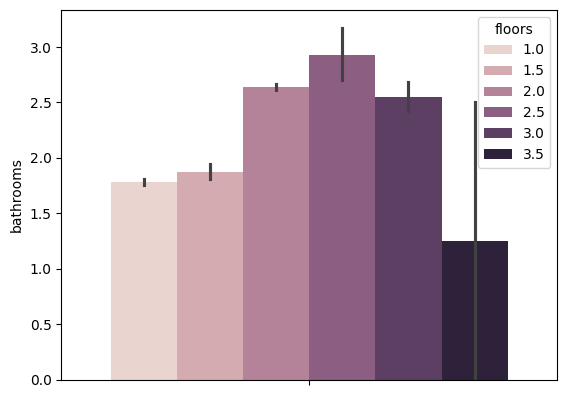

In [ ]:
sns.barplot(data=data, y='bathrooms', hue='floors')
plt.title('')
plt.show()

In [ ]:
ct1 = pd.Series(data['bedrooms']).value_counts()
ct2 = pd.Series(data['bathrooms']).value_counts()
ct3 = pd.Series(data['floors']).value_counts()
ct4 = pd.Series(data['view']).value_counts()
ct5 = pd.Series(data['yr_built']).value_counts()
ct6 = pd.Series(data['yr_renovated']).value_counts()

In [ ]:
ct6 = ct6.drop(0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'yr_renovated')

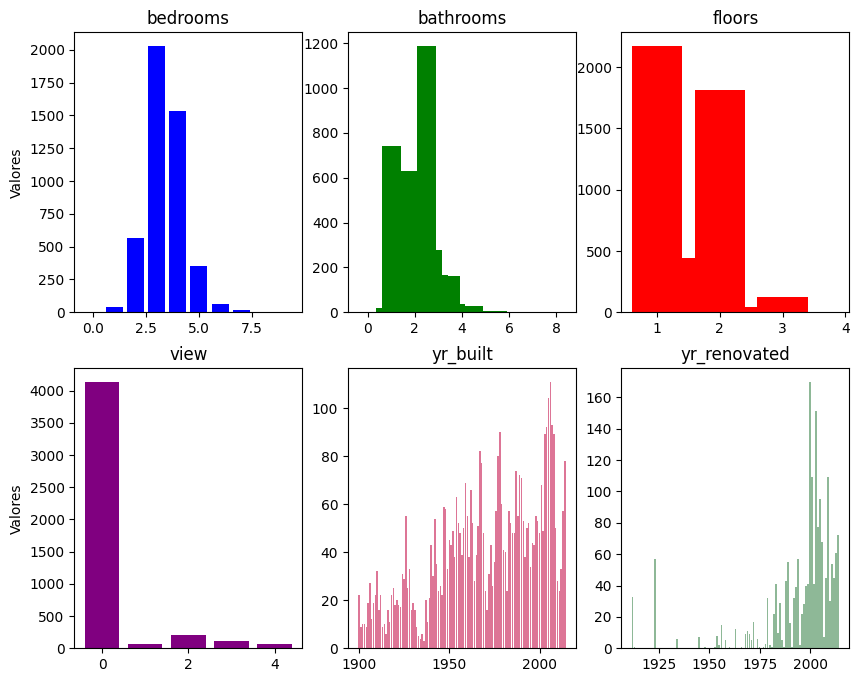

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # 2 filas y 3 columnas de subgr√°ficos
# Gr√°fico 1
axs[0, 0].bar(ct1.index, ct1, color='b')
axs[0, 0].set_title('bedrooms')
axs[0, 0].set_ylabel('Valores')
# Gr√°fico 2
axs[0, 1].bar(ct2.index, ct2, color='g')
axs[0, 1].set_title('bathrooms')

# Gr√°fico 3
axs[0, 2].bar(ct3.index, ct3, color='r')
axs[0, 2].set_title('floors')

# Gr√°fico 4
axs[1, 0].bar(ct4.index, ct4, color='purple')
axs[1, 0].set_title('view')
axs[1, 0].set_ylabel('Valores')

# Gr√°fico 5
axs[1, 1].bar(ct5.index, ct5, color='#DD7596')
axs[1, 1].set_title('yr_built')

# Gr√°fico 6
axs[1, 2].bar(ct6.index, ct6, color='#8EB897')
axs[1, 2].set_title('yr_renovated')

Interpretaci√≥n de los gr√°ficos:
*   Habitaciones: La mayor√≠a de las habitaciones tienen entre 2 y 4 habitaciones. Hay un pico en el n√∫mero de propiedades con 3 habitaciones.
*   Ba√±os: La distribuci√≥n se centra entre 1 a 3 ba√±os, con una concentracion en 2.5 ba√±os.
*   Pisos: La mayor√≠a de las viviendas tienen 1 o 2 pisos.
*   Vistas: La mayoria de las propiedades no tienen una vista (categoria 0)
*   A√±o de construcci√≥n: Hay una amplia gama de a√±os de construcci√≥n, con  un pico alrededor de los a√±os de 2000.
*   A√±os de renovaci√≥n: La mayoria de la viviendas renovadas fue recientemente.








###Histogramas

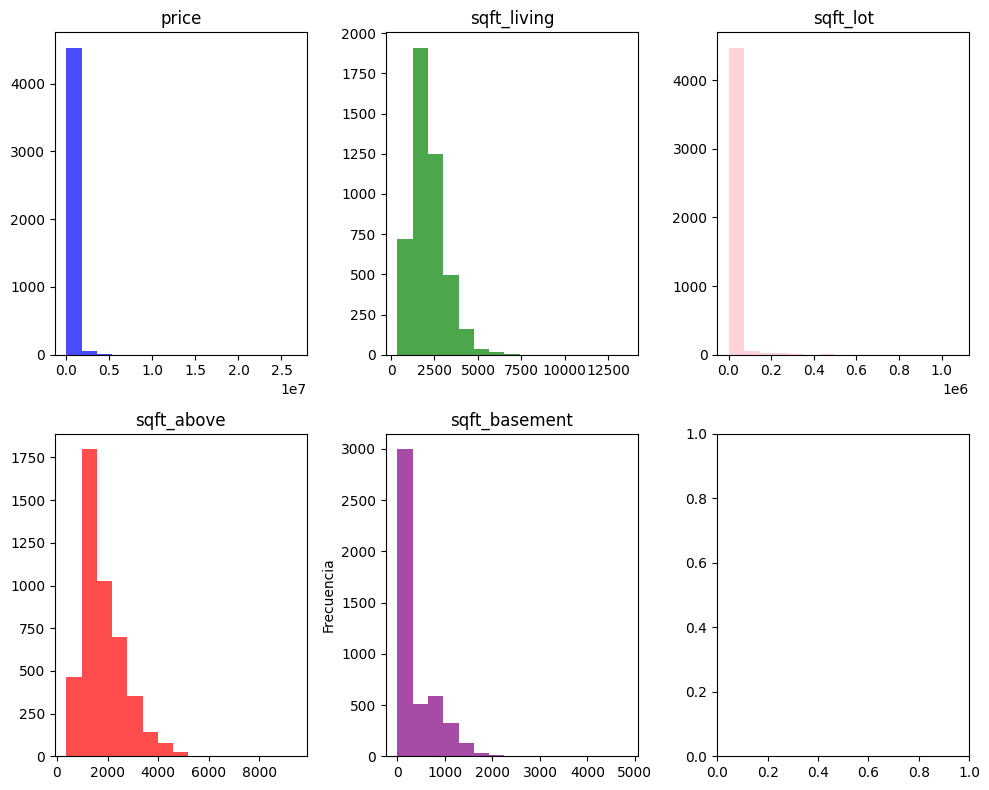

In [ ]:
#5 histogrmas
# Crear figura y subgr√°ficos
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # 2 filas y 3 columnas de subgr√°ficos

# Histograma 1
axs[0, 0].hist(data['price'], bins=15, color='blue', alpha=0.7)
axs[0, 0].set_title('price')


# Histograma 2
axs[0, 1].hist(data['sqft_living'], bins=15, color='green', alpha=0.7)
axs[0, 1].set_title('sqft_living')

# Histograma 3
axs[0, 2].hist(data['sqft_lot'], bins=15, color='pink', alpha=0.7)
axs[0, 2].set_title('sqft_lot')

# Histograma 4
axs[1, 0].hist(data['sqft_above'], bins=15, color='red', alpha=0.7)
axs[1, 0].set_title('sqft_above')


# Histograma 5
axs[1, 1].hist(data['sqft_basement'], bins=15, color='purple', alpha=0.7)
axs[1, 1].set_title('sqft_basement')
axs[1, 1].set_ylabel('Frecuencia')

# Ajustar dise√±o
plt.tight_layout()
plt.show()

Interpretaci√≥n de cada histograma:
*   Precio: La mayor√≠a de las propiedades tienen un precio que se concentra en un rango especifico, un rango que no es visible debido a la escala del eje x. El histograma tiene una cola larga hacia la derecha, indicando que existen algunas propiedades con precios signioficativamente m√°s altos.
*   sqft_living: El area habitable de las propiedades se distribuye de manera m√°s uniforme, pero si se presenta una cola larga hacia la derecha.
*   sqft_lot:El tama√±o de los lotes tambien muestran una distribuci√≥n amplia, con una tendencia a concentrase en tama√±os peque√±os, cola hacia la derecha.






### Gr√°ficos de Cajas

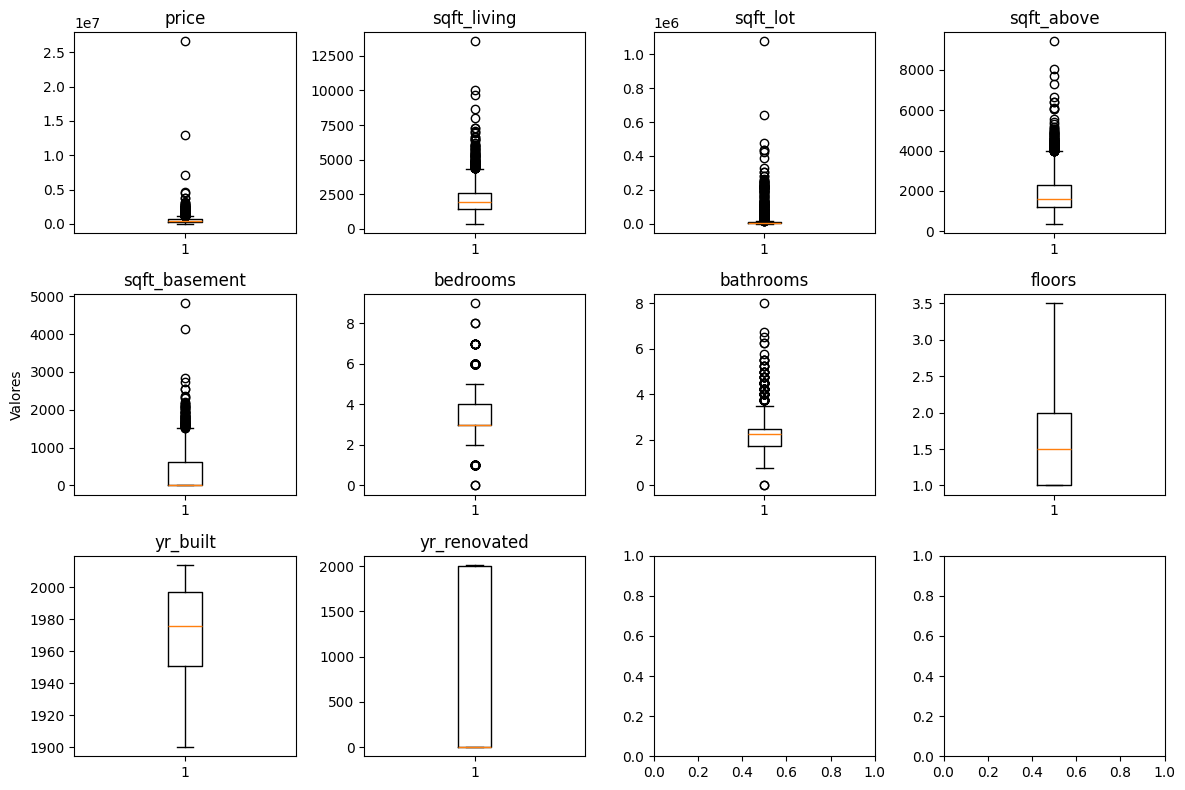

In [ ]:
# Crear figura y subgr√°ficos
fig, axs = plt.subplots(3, 4, figsize=(12, 8))  # 3 filas y 4 columnas

# Gr√°fico de cajas 1
axs[0, 0].boxplot(data['price'])
axs[0, 0].set_title('price')

# Gr√°fico de cajas 2
axs[0, 1].boxplot(data['sqft_living'])
axs[0, 1].set_title('sqft_living')

# Gr√°fico de cajas 3
axs[0, 2].boxplot(data['sqft_lot'])
axs[0, 2].set_title('sqft_lot')

# Gr√°fico de cajas 4
axs[0, 3].boxplot(data['sqft_above'])
axs[0, 3].set_title('sqft_above')

# Gr√°fico de cajas 5
axs[1, 0].boxplot(data['sqft_basement'])
axs[1, 0].set_title('sqft_basement')
axs[1, 0].set_ylabel('Valores')

# Gr√°fico de cajas 6
axs[1, 1].boxplot(data['bedrooms'])
axs[1, 1].set_title('bedrooms')

# Gr√°fico de cajas 7
axs[1, 2].boxplot(data['bathrooms'])
axs[1, 2].set_title('bathrooms')

# Gr√°fico de cajas 8
axs[1, 3].boxplot(data['floors'])
axs[1, 3].set_title('floors')

# Gr√°fico de cajas 9
axs[2, 0].boxplot(data['yr_built'])
axs[2, 0].set_title('yr_built')

# Gr√°fico de cajas 10
axs[2, 1].boxplot(data['yr_renovated'])
axs[2, 1].set_title('yr_renovated')


# Ajustar dise√±o
plt.tight_layout()
plt.show()

Debido a la distribuci√≥n de los histogramas y a la dificultad para interpretarlos de manera adecuada, se toma la decisi√≥n de eliminar los datos extremos. Es importante se√±alar que, para aplicar un modelo de regresi√≥n, es necesario cumplir con el criterio de normalidad de los datos. Sin embargo, como analista de datos, sugerir√≠a explorar otras metodolog√≠as que no requieran cumplir con este criterio, como algunos m√©todos de machine learning que son m√°s flexibles y no dependen de la normalidad ni de la homogeneidad de los datos. Modelos como los √°rboles de decisi√≥n, bosques aleatorios o m√°quinas de soporte vectorial pueden ser opciones viables para determinar el precio basado en esta base de datos, ya que no requieren supuestos estrictos sobre la distribuci√≥n de los datos.

Sin embargo, para efectos pr√°cticos y con el fin de cumplir con los objetivos del proyecto final, tengo dos opciones para mejorar el an√°lisis. La primera opci√≥n consiste en continuar con la eliminaci√≥n de los datos extremos y aplicar un modelo de regresi√≥n bajo los supuestos de normalidad y homogeneidad de los datos, lo que permitir√≠a obtener un modelo m√°s interpretable. La segunda opci√≥n es normalizar o estandarizar los datos, lo que podr√≠a ayudar a cumplir los requisitos de normalidad y homogeneidad, facilitando la aplicaci√≥n de modelos de regresi√≥n m√°s convencionales o de machine learning que dependen de estos supuestos.

In [ ]:
# Eliminar outliers usando IQR
Q1_1 = data['price'].quantile(0.25)
Q3_1 = data['price'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1
Q1_2 = data['sqft_living'].quantile(0.25)
Q3_2 = data['sqft_living'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2
Q1_3 = data['sqft_lot'].quantile(0.25)
Q3_3 = data['sqft_lot'].quantile(0.75)
IQR_3 = Q3_3 - Q1_3
Q1_4 = data['sqft_above'].quantile(0.25)
Q3_4 = data['sqft_above'].quantile(0.75)
IQR_4 = Q3_4 - Q1_4
Q1_5 = data['sqft_basement'].quantile(0.25)
Q3_5 = data['sqft_basement'].quantile(0.75)
IQR_5 = Q3_5 - Q1_5
Q1_6 = data['bedrooms'].quantile(0.25)
Q3_6 = data['bedrooms'].quantile(0.75)
IQR_6 = Q3_6 - Q1_6
Q1_7 = data['bathrooms'].quantile(0.25)
Q3_7 = data['bathrooms'].quantile(0.75)
IQR_7 = Q3_7 - Q1_7
Q1_8 = data['floors'].quantile(0.25)
Q3_8 = data['floors'].quantile(0.75)
IQR_8 = Q3_8 - Q1_8
Q1_9 = data['yr_built'].quantile(0.25)
Q3_9 = data['yr_built'].quantile(0.75)
IQR_9 = Q3_9 - Q1_9
Q1_10 = data['yr_renovated'].quantile(0.25)
Q3_10 = data['yr_renovated'].quantile(0.75)
IQR_10 = Q3_10 - Q1_10

In [ ]:
data1 = data[(data['price'] >= Q1_1 - 1.5 * IQR_1) & (data['price'] <= Q3_1 + 1.5 * IQR_1)]
data2 = data1[(data1['sqft_living'] >= Q1_2 - 1.5 * IQR_2) & (data1['sqft_living'] <= Q3_2 + 1.5 * IQR_2)]
data3 = data2[(data2['sqft_lot'] >= Q1_3 - 1.5 * IQR_3) & (data2['sqft_lot'] <= Q3_3 + 1.5 * IQR_3)]
data4 = data3[(data3['sqft_above'] >= Q1_4 - 1.5 * IQR_4) & (data3['sqft_above'] <= Q3_4 + 1.5 * IQR_4)]
data5 = data4[(data4['sqft_basement'] >= Q1_5 - 1.5 * IQR_5) & (data4['sqft_basement'] <= Q3_5 + 1.5 * IQR_5)]
data6 = data5[(data5['bedrooms'] >= Q1_6 - 1.5 * IQR_6) & (data5['bedrooms'] <= Q3_6 + 1.5 * IQR_6)]
data7 = data6[(data6['bathrooms'] >= Q1_7 - 1.5 * IQR_7) & (data6['bathrooms'] <= Q3_7 + 1.5 * IQR_7)]
data8 = data7[(data7['floors'] >= Q1_8 - 1.5 * IQR_8) & (data7['floors'] <= Q3_8 + 1.5 * IQR_8)]
data9 = data8[(data8['yr_built'] >= Q1_9 - 1.5 * IQR_9) & (data8['yr_built'] <= Q3_9 + 1.5 * IQR_9)]
data10 = data9[(data9['yr_renovated'] >= Q1_10 - 1.5 * IQR_10) & (data9['yr_renovated'] <= Q3_10 + 1.5 * IQR_10)]

In [ ]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3692 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           3692 non-null   object  
 1   price          3692 non-null   float64 
 2   bedrooms       3692 non-null   float64 
 3   bathrooms      3692 non-null   float64 
 4   sqft_living    3692 non-null   int64   
 5   sqft_lot       3692 non-null   int64   
 6   floors         3692 non-null   float64 
 7   waterfront     3692 non-null   category
 8   view           3692 non-null   int64   
 9   condition      3692 non-null   category
 10  sqft_above     3692 non-null   int64   
 11  sqft_basement  3692 non-null   int64   
 12  yr_built       3692 non-null   int64   
 13  yr_renovated   3692 non-null   int64   
 14  street         3692 non-null   object  
 15  city           3692 non-null   object  
 16  statezip       3692 non-null   object  
 17  country        3692 non-null   object 

Una vez eliminados los datos extremos, el conjunto de datos ahora cuenta con **3,692** registros, en comparaci√≥n con los 4,600 datos originales. Esto implica una p√©rdida m√≠nima de informaci√≥n, lo cual se considera aceptable para proceder con la aplicaci√≥n del modelo de regresi√≥n. Este ajuste asegura que los datos sean m√°s representativos y adecuados para cumplir con los supuestos requeridos por el modelo, mejorando as√≠ la calidad del an√°lisis y las predicciones.

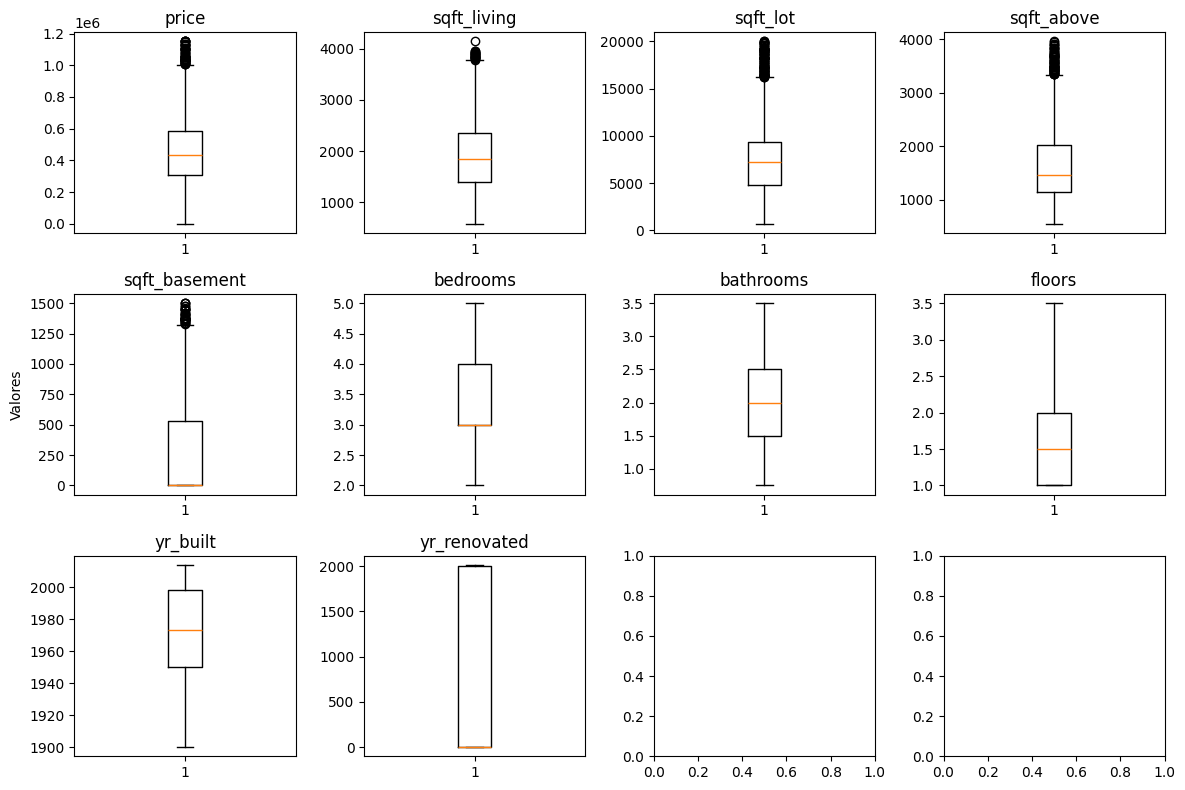

In [ ]:
# Crear figura y subgr√°ficos
fig, axs = plt.subplots(3, 4, figsize=(12, 8))  # 3 filas y 4 columnas

# Gr√°fico de cajas 1
axs[0, 0].boxplot(data10['price'])
axs[0, 0].set_title('price')

# Gr√°fico de cajas 2
axs[0, 1].boxplot(data10['sqft_living'])
axs[0, 1].set_title('sqft_living')

# Gr√°fico de cajas 3
axs[0, 2].boxplot(data10['sqft_lot'])
axs[0, 2].set_title('sqft_lot')

# Gr√°fico de cajas 4
axs[0, 3].boxplot(data10['sqft_above'])
axs[0, 3].set_title('sqft_above')

# Gr√°fico de cajas 5
axs[1, 0].boxplot(data10['sqft_basement'])
axs[1, 0].set_title('sqft_basement')
axs[1, 0].set_ylabel('Valores')

# Gr√°fico de cajas 6
axs[1, 1].boxplot(data10['bedrooms'])
axs[1, 1].set_title('bedrooms')

# Gr√°fico de cajas 7
axs[1, 2].boxplot(data10['bathrooms'])
axs[1, 2].set_title('bathrooms')

# Gr√°fico de cajas 8
axs[1, 3].boxplot(data10['floors'])
axs[1, 3].set_title('floors')

# Gr√°fico de cajas 9
axs[2, 0].boxplot(data10['yr_built'])
axs[2, 0].set_title('yr_built')

# Gr√°fico de cajas 10
axs[2, 1].boxplot(data10['yr_renovated'])
axs[2, 1].set_title('yr_renovated')


# Ajustar dise√±o
plt.tight_layout()
plt.show()

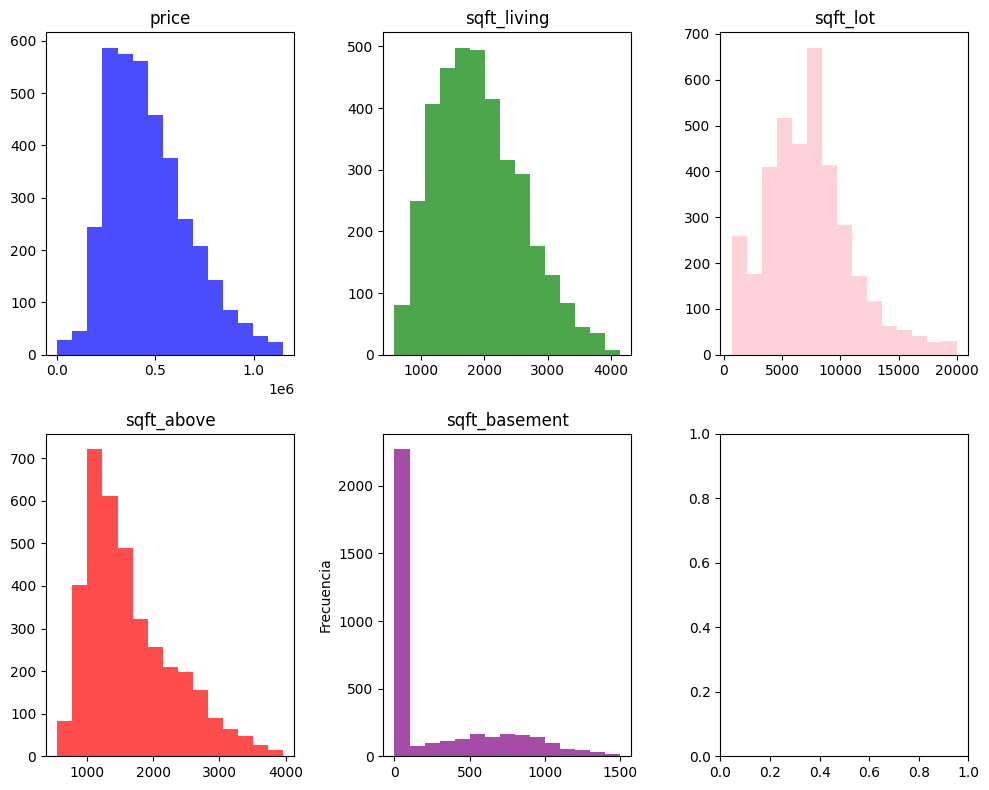

In [ ]:
#5 histogrmas
# Crear figura y subgr√°ficos
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # 2 filas y 3 columnas de subgr√°ficos

# Histograma 1
axs[0, 0].hist(data10['price'], bins=15, color='blue', alpha=0.7)
axs[0, 0].set_title('price')


# Histograma 2
axs[0, 1].hist(data10['sqft_living'], bins=15, color='green', alpha=0.7)
axs[0, 1].set_title('sqft_living')

# Histograma 3
axs[0, 2].hist(data10['sqft_lot'], bins=15, color='pink', alpha=0.7)
axs[0, 2].set_title('sqft_lot')

# Histograma 4
axs[1, 0].hist(data10['sqft_above'], bins=15, color='red', alpha=0.7)
axs[1, 0].set_title('sqft_above')


# Histograma 5
axs[1, 1].hist(data10['sqft_basement'], bins=15, color='purple', alpha=0.7)
axs[1, 1].set_title('sqft_basement')
axs[1, 1].set_ylabel('Frecuencia')

# Ajustar dise√±o
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'yr_renovated')

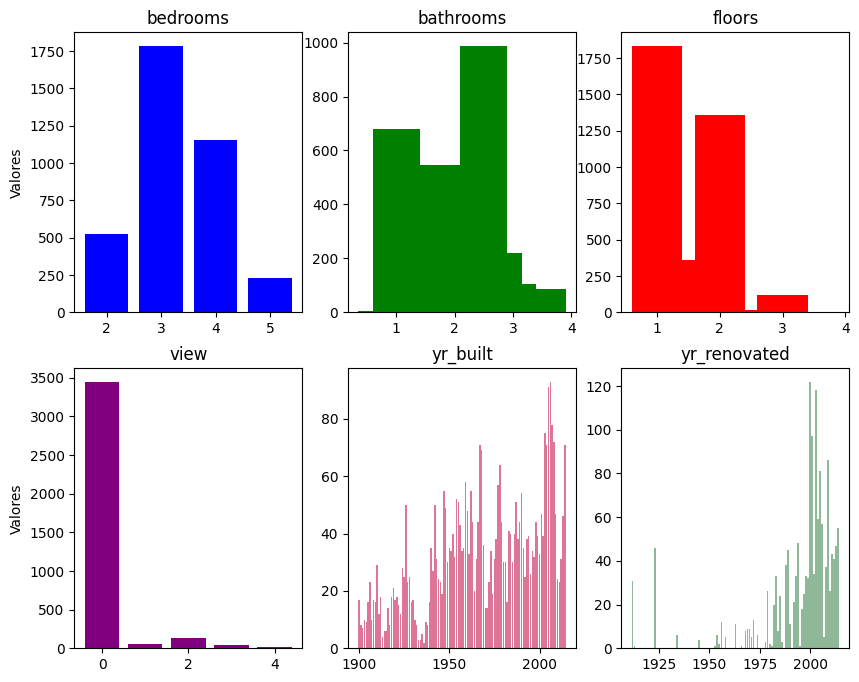

In [ ]:
ct1 = pd.Series(data10['bedrooms']).value_counts()
ct2 = pd.Series(data10['bathrooms']).value_counts()
ct3 = pd.Series(data10['floors']).value_counts()
ct4 = pd.Series(data10['view']).value_counts()
ct5 = pd.Series(data10['yr_built']).value_counts()
ct6 = pd.Series(data10['yr_renovated']).value_counts()
ct6 = ct6.drop(0)
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # 2 filas y 3 columnas de subgr√°ficos
# Gr√°fico 1
axs[0, 0].bar(ct1.index, ct1, color='b')
axs[0, 0].set_title('bedrooms')
axs[0, 0].set_ylabel('Valores')
# Gr√°fico 2
axs[0, 1].bar(ct2.index, ct2, color='g')
axs[0, 1].set_title('bathrooms')

# Gr√°fico 3
axs[0, 2].bar(ct3.index, ct3, color='r')
axs[0, 2].set_title('floors')

# Gr√°fico 4
axs[1, 0].bar(ct4.index, ct4, color='purple')
axs[1, 0].set_title('view')
axs[1, 0].set_ylabel('Valores')

# Gr√°fico 5
axs[1, 1].bar(ct5.index, ct5, color='#DD7596')
axs[1, 1].set_title('yr_built')

# Gr√°fico 6
axs[1, 2].bar(ct6.index, ct6, color='#8EB897')
axs[1, 2].set_title('yr_renovated')

###Gr√°ficos de disperci√≥n

<Figure size 1400x600 with 0 Axes>

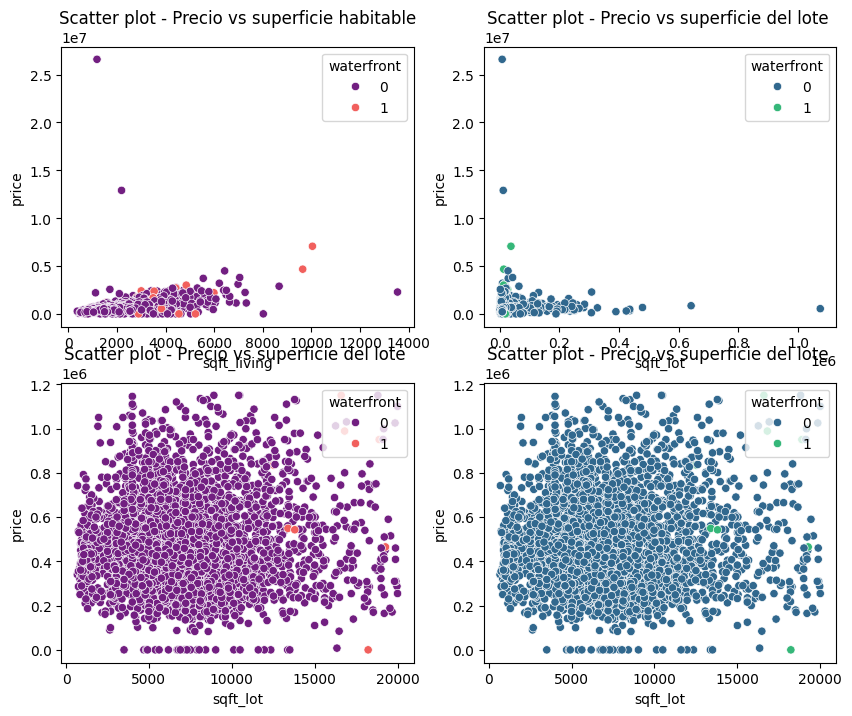

In [ ]:
# visualizacion distribuci√≥n variables

f = plp.figure(figsize=(14,6))
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


sns.scatterplot(x='sqft_living',y='price',data=data,palette='magma',hue='waterfront',ax=axs[0, 0])
axs[0, 0].set_title('Scatter plot - Precio vs superficie habitable')


sns.scatterplot(x='sqft_lot',y='price',data=data,palette='viridis',hue='waterfront',ax=axs[0, 1])
axs[0, 1].set_title('Scatter plot - Precio vs superficie del lote ')


sns.scatterplot(x='sqft_lot',y='price',data=data10,palette='magma',hue='waterfront',ax=axs[1, 0])
axs[1, 0].set_title('Scatter plot - Precio vs superficie del lote ')


sns.scatterplot(x='sqft_lot',y='price',data=data10,palette='viridis',hue='waterfront',ax=axs[1, 1])
axs[1, 1].set_title('Scatter plot - Precio vs superficie del lote ')

plp.savefig('sc.png')

<Figure size 1400x600 with 0 Axes>

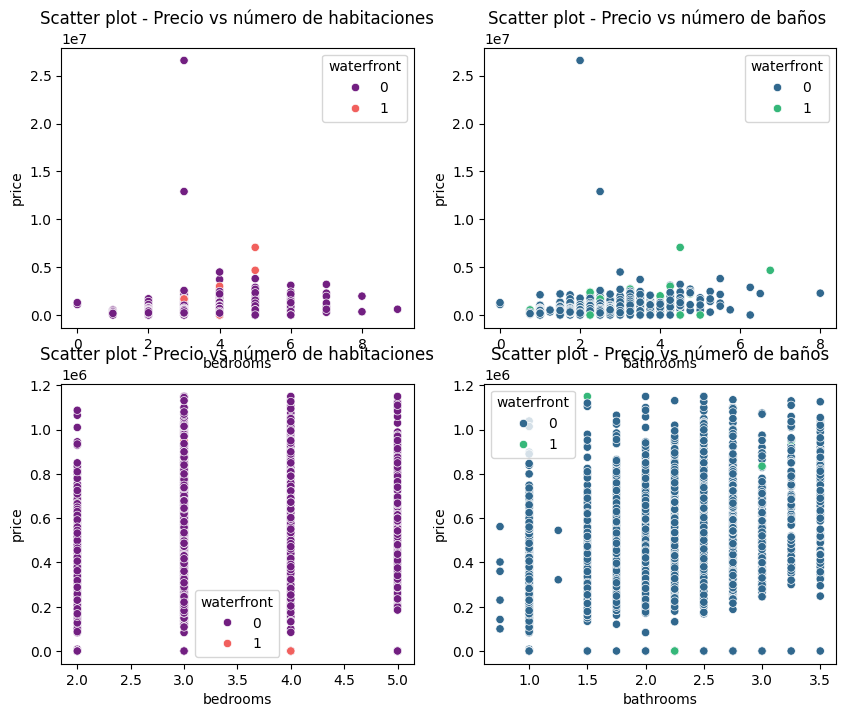

In [ ]:
# visualizacion distribuci√≥n variables

f = plp.figure(figsize=(14,6))
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


sns.scatterplot(x='bedrooms',y='price',data=data,palette='magma',hue='waterfront',ax=axs[0, 0])
axs[0, 0].set_title('Scatter plot - Precio vs n√∫mero de habitaciones')


sns.scatterplot(x='bathrooms',y='price',data=data,palette='viridis',hue='waterfront',ax=axs[0, 1])
axs[0, 1].set_title('Scatter plot - Precio vs n√∫mero de ba√±os ')


sns.scatterplot(x='bedrooms',y='price',data=data10,palette='magma',hue='waterfront',ax=axs[1, 0])
axs[1, 0].set_title('Scatter plot - Precio vs n√∫mero de habitaciones')


sns.scatterplot(x='bathrooms',y='price',data=data10,palette='viridis',hue='waterfront',ax=axs[1, 1])
axs[1, 1].set_title('Scatter plot - Precio vs n√∫mero de ba√±os')

plp.savefig('sc.png')

Por √∫ltimo, en el an√°lisis visual, se realizaron gr√°ficos de dispersi√≥n. Los primeros gr√°ficos corresponden a las variables precio vs. superficie habitable y precio vs. superficie del lote. En la parte superior, se presentan los gr√°ficos de la base de datos original, mientras que en la parte inferior se muestran los gr√°ficos generados con los datos limpios, es decir, sin los datos extremos.

A simple vista, no se observa una relaci√≥n lineal clara entre las variables analizadas. Asimismo, no se identifica una divisi√≥n significativa que indique que las propiedades frente al mar tienen un impacto distintivo en la determinaci√≥n del precio. Esto sugiere que otros factores podr√≠an estar influyendo de manera m√°s relevante en el comportamiento de los precios.



###Mapas de calor

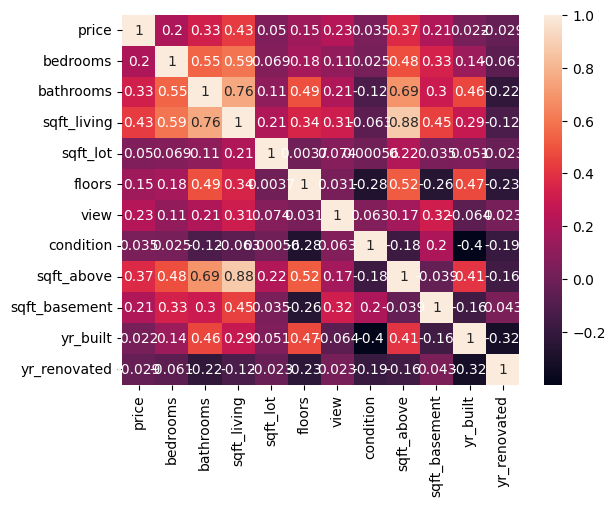

In [ ]:
# estudio correlacion de variables de la base de datos original
data['condition'] = data['condition'].astype('int64')
df = data.select_dtypes(include=['number'])
corr = df.corr()
sns.heatmap(corr, annot= True);

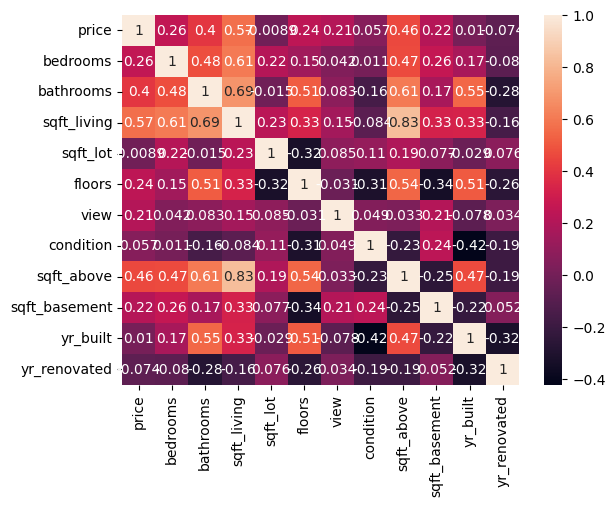

In [ ]:
# estudio correlacion de variables de la base de datos limpia
data10['condition'] = data['condition'].astype('int64')
df = data10.select_dtypes(include=['number'])
corr = df.corr()
sns.heatmap(corr, annot= True);

**An√°lisis de las Correlaciones Relevantes:**
 * Precio vs. √Årea habitable (sqft_living, sqft_above, sqft_basement): Existe una fuerte correlaci√≥n positiva entre el precio y el √°rea habitable total, as√≠ como con las √°reas espec√≠ficas por encima y por debajo del suelo. Esto es intuitivo: a mayor tama√±o de la propiedad, mayor suele ser su precio.
 * Precio vs. N√∫mero de ba√±os (bathrooms): Tambi√©n hay una correlaci√≥n positiva moderada entre el precio y el n√∫mero de ba√±os. Esto sugiere que las propiedades con m√°s ba√±os tienden a ser m√°s caras.
 * Precio vs. N√∫mero de habitaciones (bedrooms): Existe una correlaci√≥n positiva, aunque un poco m√°s d√©bil, entre el precio y el n√∫mero de habitaciones.

**Otras correlaciones interesantes:**
 * √Årea habitable vs. N√∫mero de ba√±os y habitaciones: Existe una fuerte correlaci√≥n positiva entre estas variables, lo que indica que las propiedades m√°s grandes tienden a tener m√°s habitaciones y ba√±os.
 * A√±o de construcci√≥n vs. N√∫mero de ba√±os: Hay una correlaci√≥n positiva moderada, lo que sugiere que las casas m√°s nuevas tienden a tener m√°s ba√±os.
Implicaciones para el Modelo de Regresi√≥n


In [ ]:
import plotly.express as px

In [ ]:
fig = px.imshow(corr,
                text_auto = True)

fig.show()

**Variables a incluir en el modelo**
Bas√°ndonos en la matriz de correlaci√≥n, las siguientes variables parecen ser buenas candidatas para incluir en un modelo de regresi√≥n para predecir el precio de las propiedades:
 * √Årea habitable total (**sqft_living**): Es la variable con la correlaci√≥n m√°s fuerte con el precio.
 * N√∫mero de ba√±os (**bathrooms**): Tiene una correlaci√≥n positiva moderada con el precio y puede aportar valor al modelo.
 * N√∫mero de habitaciones (**bedrooms**): Aunque la correlaci√≥n es m√°s d√©bil, podr√≠a incluirse.
 * A√±o de construcci√≥n (**yr_built**): Podr√≠a ser relevante, especialmente si hay una tendencia clara de aumento de precios con propiedades m√°s nuevas.
 * Otras variables: Dependiendo del contexto y del objetivo del an√°lisis, podr√≠as considerar incluir otras variables como la condici√≥n de la propiedad, la presencia de una vista, etc.

La matriz de correlaci√≥n proporciona una visi√≥n general de las relaciones entre las variables y ayuda a seleccionar las variables m√°s relevantes para tu modelo de regresi√≥n. Sin embargo, es importante realizar un an√°lisis m√°s profundo y considerar otros factores antes de tomar decisiones definitivas.



#Fase 3: Fase de entrenamiento.

##Hip√≥tesis 1
Se propone que un modelo predictivo de regresi√≥n lineal m√∫ltiple puede estimar de manera significativa el precio de una vivienda (y) en funci√≥n de las siguientes variables independientes:


1.   **sqft_living:** Superficie habitable en pies cuadrados.
2.   **sqft_lot:** Superficie total del lote en pies cuadrados.
3.   **sqft_above:** Superficie sobre el nivel del suelo en pies cuadrados.
4.   **sqft_basement:** Superficie del s√≥tano en pies cuadrados.
5.   **bedrooms:** N√∫mero de habitaciones.
6.   **bathrooms:** N√∫mero de ba√±os.
7.   **floors:** N√∫mero de pisos.
8.   **condition:** Condici√≥n general de la vivienda.

Hip√≥tesis Estad√≠stica:

1. Hip√≥tesis Nula (H‚Çí): Las variables independientes no tienen un efecto significativo en la predicci√≥n del precio de la vivienda.

Œ≤1 = Œ≤2 = . . . = Œ≤8 = 0
2. Hip√≥tesis Alternativa (H‚Çê): Al menos una de las variables independientes tiene un efecto significativo en la predicci√≥n del precio de la vivienda.

‚àÉŒ≤·µ¢ ‚â† 0 donde ùëñ ‚àà {1,2,...,8}. **texto en negrita**

Supuestos del Modelo:

1. Relaci√≥n lineal entre las variables independientes y el precio de la vivienda.
2. Normalidad de los residuos.
3. Homocedasticidad de los errores (varianza constante).
4. Ausencia de colinealidad entre las variables independientes.

**Objetivo:**
Determinar si las variables mencionadas pueden explicar de manera significativa la variaci√≥n en el precio de la vivienda y evaluar la capacidad predictiva del modelo.

In [ ]:
# preparamos el dataset de la hip√≥tesis 1
# borramos las columnas categ√≥ricas
df_num = data10.select_dtypes(include=['number'])

In [ ]:
X_hipot1 = df_num.drop(columns=['price','view','yr_built','yr_renovated']) #  variables independientes
y_hipot1 = df_num['price'] # variable dependiente

In [ ]:
X_hipot1.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  sqft_above  \
0       3.0       1.50         1340      7912     1.5          3        1340   
2       3.0       2.00         1930     11947     1.0          4        1930   
3       3.0       2.25         2000      8030     1.0          4        1000   
4       4.0       2.50         1940     10500     1.0          4        1140   
5       2.0       1.00          880      6380     1.0          3         880   

   sqft_basement  
0              0  
2              0  
3           1000  
4            800  
5              0

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

A diferencia de la funci√≥n utilizada para crear el modelo con LinearRegression de scikit-learn, optar√© por utilizar OLS de statsmodels, ya que considero que es una herramienta mucho m√°s completa para la interpretaci√≥n y comparaci√≥n de modelos de regresi√≥n. Con OLS, es posible obtener un an√°lisis detallado de los coeficientes, incluyendo los valores p (p-values), intervalos de confianza y estad√≠sticas de diagn√≥stico, lo que permite identificar y evaluar cu√°les son las variables m√°s influyentes en el modelo.

Adem√°s, el resumen generado por OLS facilita la validaci√≥n de supuestos como la significancia de los coeficientes, la multicolinealidad y el ajuste general del modelo a trav√©s del R2
 ajustado y otras m√©tricas estad√≠sticas. Estas caracter√≠sticas son esenciales para una comprensi√≥n m√°s profunda del comportamiento del modelo y para tomar decisiones fundamentadas sobre su optimizaci√≥n.

In [ ]:
# Agregar una constante para la intersecci√≥n (bias o Œ≤0)
X_hipot1 = sm.add_constant(X_hipot1)

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.20, random_state=43)

In [ ]:
# Crear el modelo de regresi√≥n lineal m√∫ltiple
model = sm.OLS(y_hipot1_train, X_hipot1_train).fit()

In [ ]:
# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     237.0
Date:                Fri, 03 Jan 2025   Prob (F-statistic):          3.45e-280
Time:                        20:48:35   Log-Likelihood:                -39683.
No. Observations:                2953   AIC:                         7.938e+04
Df Residuals:                    2945   BIC:                         7.943e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.757e+04    2.5e+04      2.701

La salida nos proporciona un resumen detallado del modelo para predecir el precio de una propiedad en funci√≥n de las 8 variables independientes.
**Elementos importantes e interpretaci√≥n:**
*   R-cuadrado: Indica la proporci√≥n de la variabilidad en el precio explicada por el modelo, aproximadamente un 35.9%. Aunque el modelo explica una parte de la variabilidad, queda una proporci√≥n a√∫n mayor sin explicar. Esto sugiere que faltan variables importantes por incluir o que la relaci√≥n entre las variables no es estrictamente lineal.
*   Coeficientes: Cada coeficiente asociado a una variable independiente representa el cambio esperado en el precio por un incremento de una unidad en dicha variable, manteniendo las dem√°s constantes. Por ejemplo, un aumento de una habitaci√≥n se asocia con un incremento de 36,220 d√≥lares en el precio, seg√∫n el modelo (asumiendo que los precios est√°n en d√≥lares, dado que los registros corresponden a propiedades en Estados Unidos).
*   Valor p: Indica la significancia estad√≠stica de cada coeficiente. Un valor p menor a 0.05 sugiere que el coeficiente es estad√≠sticamente significativo.
*   Estad√≠sticos de bondad de ajuste:
    *   Durbin-Watson: Eval√∫a la autocorrelaci√≥n de los residuos. Un valor cercano a 2 indica que no hay autocorrelaci√≥n. En este caso, el valor es 1.937, lo que indica que no hay problemas de autocorrelaci√≥n en los residuos.
    *   Omnibus y Jarque-Bera: Eval√∫an si los residuos siguen una distribuci√≥n normal. Los valores p bajos en ambas pruebas indican que los datos no se distribuyen normalmente, lo cual sugiere la presencia de asimetr√≠a.
    *   Cond. No (N√∫mero de condici√≥n de la matriz de dise√±o): Indica el nivel de multicolinealidad entre las variables independientes. Un valor alto sugiere problemas de multicolinealidad. En este modelo, el valor es demasiado alto, lo que indica un grave problema de multicolinealidad.

*  Variables significativas:
Seg√∫n los valores p, solo el n√∫mero de ba√±os (bathrooms) no es significativo para la predicci√≥n del precio.

**Consideraciones**:
1. Para cumplir el criterio de normalidad:
  * Transformar los datos para normalizar su distribuci√≥n (por ejemplo, utilizando transformaciones logar√≠tmicas o de Box-Cox).
  * Alternativamente, emplear modelos no param√©tricos, que no requieran asumir normalidad en los datos.
2. Para eliminar la multicolinealidad:
  * Identificar y eliminar variables altamente correlacionadas, es decir, eliminar una de ellas o combinar variables relacionadas.
  * Aplicar t√©cnicas de regularizaci√≥n como Ridge y Lasso, que pueden reducir el impacto de la multicolinealidad y mejorar la estabilidad del modelo.




In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_hipot1_test)

In [ ]:
# M√©tricas del modelo
mse = mean_squared_error(y_hipot1_test, y_pred)
r2 = r2_score(y_hipot1_test, y_pred)

print(f"Error Cuadr√°tico Medio (MSE): {mse}")
print(f"Coeficiente de Determinaci√≥n (R^2): {r2}")

Error Cuadr√°tico Medio (MSE): 23414785155.20437
Coeficiente de Determinaci√≥n (R^2): 0.43177598874964673


##Hip√≥tesis 2
Se propone que un modelo predictivo de regresi√≥n lineal m√∫ltiple puede estimar de manera significativa el precio de una vivienda (y) en funci√≥n de las siguientes variables independientes:


1.   **sqft_living:** Superficie habitable en pies cuadrados.
2.   **sqft_lot:** Superficie total del lote en pies cuadrados.
3.   **bedrooms:** N√∫mero de habitaciones.
4.   **floors:** N√∫mero de pisos.
5.   **condition:** Condici√≥n general de la vivienda.
6.   **y_built:** A√±o de construcci√≥n.

En este caso, a diferencia del primer modelo, se decidi√≥ eliminar las variables que presentan una alta correlaci√≥n con m√°s de una variable independiente. Estas variables son sqft_above, sqft_basement y bathrooms. Adem√°s, se incorpor√≥ la variable yr_built, que representa el a√±o de construcci√≥n de la propiedad, como una nueva variable independiente en el modelo.

Este ajuste busca reducir los problemas de multicolinealidad y mejorar la capacidad del modelo para interpretar y predecir el precio de las propiedades

Hip√≥tesis Estad√≠stica:

1. Hip√≥tesis Nula (H‚Çí): Las variables independientes no tienen un efecto significativo en la predicci√≥n del precio de la vivienda.

Œ≤1 = Œ≤2 = . . . = Œ≤6 = 0
2. Hip√≥tesis Alternativa (H‚Çê): Al menos una de las variables independientes tiene un efecto significativo en la predicci√≥n del precio de la vivienda.

‚àÉŒ≤·µ¢ ‚â† 0 donde ùëñ ‚àà {1,2,...,6}.

In [ ]:
X_hipot2 = df_num.drop(columns=['price','view',
                                'yr_renovated','sqft_above','bathrooms','sqft_basement']) #  variables independientes
y_hipot2 = df_num['price'] # variable dependiente

In [ ]:
X_hipot2.head()

bedrooms  sqft_living  sqft_lot  floors  condition  yr_built
0       3.0         1340      7912     1.5          3      1955
2       3.0         1930     11947     1.0          4      1966
3       3.0         2000      8030     1.0          4      1963
4       4.0         1940     10500     1.0          4      1976
5       2.0          880      6380     1.0          3      1938

In [ ]:
# Agregar una constante para la intersecci√≥n (bias o Œ≤0)
X_hipot2 = sm.add_constant(X_hipot2)

In [ ]:
# preparamos train data y test data
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.20, random_state=43)

In [ ]:
# Crear el modelo de regresi√≥n lineal m√∫ltiple
model2 = sm.OLS(y_hipot2_train, X_hipot2_train).fit()

In [ ]:
# Resumen del modelo
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     326.3
Date:                Fri, 03 Jan 2025   Prob (F-statistic):          1.77e-321
Time:                        22:41:13   Log-Likelihood:                -39590.
No. Observations:                2953   AIC:                         7.919e+04
Df Residuals:                    2946   BIC:                         7.924e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.435e+06   2.44e+05     14.077      

En resumen, aunque no se observa una mejora significativa en el desempe√±o del modelo, se verifica que todas las variables incluidas presentan coeficientes estad√≠sticamente significativos. Sin embargo, persiste el problema del incumplimiento del supuesto de normalidad en los datos, as√≠ como la presencia de multicolinealidad entre las variables independientes, lo que podr√≠a estar afectando la estabilidad y precisi√≥n del modelo.

In [ ]:
# Predicciones en el conjunto de prueba
y_pred2 = model2.predict(X_hipot2_test)

In [ ]:
# M√©tricas del modelo
mse2 = mean_squared_error(y_hipot2_test, y_pred2)
r22 = r2_score(y_hipot2_test, y_pred2)

print(f"Error Cuadr√°tico Medio (MSE): {mse2}")
print(f"Coeficiente de Determinaci√≥n (R^2): {r22}")

Error Cuadr√°tico Medio (MSE): 22137717407.031178
Coeficiente de Determinaci√≥n (R^2): 0.46276754189418356


##Hip√≥tesis 3
Esta hip√≥tesis busca evaluar si la transformaci√≥n de las variables (normalizaci√≥n) y la inclusi√≥n de una nueva variable (yr_built) tienen un impacto positivo en la capacidad del modelo para explicar la variabilidad del precio de las propiedades, reflejado en m√©tricas como el
R2 ajustado, los valores p de los coeficientes y la reducci√≥n de problemas como la multicolinealidad y la falta de normalidad.

En este ejemplo se utiliza estandarizaci√≥n en las siguentes variables independientes:
1.   **sqft_living:** Superficie habitable en pies cuadrados.
2.   **sqft_lot:** Superficie total del lote en pies cuadrados.
3.   **sqft_above:** Superficie sobre el nivel del suelo en pies cuadrados.
4.   **sqft_basement:** Superficie del s√≥tano en pies cuadrados.
5.   **bedrooms:** N√∫mero de habitaciones.
6.   **bathrooms:** N√∫mero de ba√±os.
7.   **floors:** N√∫mero de pisos.
8.   **condition:** Condici√≥n general de la vivienda.
9.   **y_built:** A√±o de construcci√≥n.

Hip√≥tesis Estad√≠stica:

1. Hip√≥tesis Nula (H‚Çí): La normalizaci√≥n de las variables independientes, incluyendo la variable adicional del a√±o de construcci√≥n (yr_built), no mejora significativamente el desempe√±o del modelo de regresi√≥n lineal m√∫ltiple ni su capacidad para predecir el precio de una propiedad.

Œ≤1 = Œ≤2 = . . . = Œ≤9 = 0
2. Hip√≥tesis Alternativa (H‚Çê): La normalizaci√≥n de las variables independientes, junto con la inclusi√≥n de la variable del a√±o de construcci√≥n (yr_built), mejora significativamente el desempe√±o del modelo de regresi√≥n lineal m√∫ltiple y permite obtener un modelo estad√≠sticamente significativo para la predicci√≥n del precio de una propiedad.

‚àÉŒ≤·µ¢ ‚â† 0 donde ùëñ ‚àà {1,2,...,9}.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Separar variables independientes y dependiente
X = df_num[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'condition','yr_built']]
y = df_num['price']

In [ ]:
# Normalizar las variables independientes
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Modelo de regresi√≥n lineal m√∫ltiple con scikit-learn
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones
y_pred = lr.predict(X_test)

# Evaluaci√≥n del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadr√°tico Medio (MSE): {mse}")
print(f"Coeficiente de Determinaci√≥n (R^2): {r2}")

Error Cuadr√°tico Medio (MSE): 26343125336.191315
Coeficiente de Determinaci√≥n (R^2): 0.4043021481762349


In [ ]:
# Usando statsmodels para an√°lisis detallado
X_train_sm = sm.add_constant(X_train)  # Agregar la constante
model = sm.OLS(y_train, X_train_sm).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     267.7
Date:                Fri, 03 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:23:54   Log-Likelihood:                -39509.
No. Observations:                2953   AIC:                         7.904e+04
Df Residuals:                    2944   BIC:                         7.909e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.648e+05   2884.264    161.150      0.0

A pesar de que se realiz√≥ una normalizaci√≥n de los datos, no se observa una mejora significativa en el rendimiento del modelo. Esto sugiere que las variables utilizadas hasta ahora no son suficientes para predecir de manera precisa el costo de la propiedad. Por lo tanto, es necesario analizar otras variables que podr√≠an influir en el precio y explorar la posibilidad de incorporar nuevos factores en el modelo. Adem√°s, podr√≠a ser √∫til aplicar otros tipos de modelos de regresi√≥n, como regresi√≥n polin√≥mica o modelos basados en machine learning, que no dependan tanto de las suposiciones de normalidad y linealidad de los datos. Esto permitir√° evaluar si un enfoque diferente puede ofrecer una mejor predicci√≥n del precio de las propiedades.

##An√°lisis Extra

Una vez analizados los tres escenarios anteriores utilizando el modelo de regresi√≥n m√∫ltiple, se procedi√≥ a implementar dos modelos adicionales: Gradient Boosting y las Redes Neuronales, que son t√©cnicas ampliamente utilizadas en problemas de predicci√≥n. Sin embargo, al ejecutar estos modelos, se comprob√≥ que las variables analizadas contin√∫an siendo insuficientes para predecir de manera precisa el precio de las propiedades. Esto sugiere que, aunque estos modelos m√°s complejos pueden capturar relaciones no lineales y patrones m√°s complejos, las variables actuales no reflejan completamente los factores que influyen en el precio de una propiedad. Por lo tanto, es necesario considerar nuevas variables o incluso reformular el enfoque para mejorar la capacidad predictiva del modelo.

####Modelo de Gradient Boosting

In [ ]:
# Separar variables independientes y dependiente
X_hipot4 = df_num.drop(columns=['price','view',
                                'yr_renovated']) #  variables independientes
y_hipot4 = df_num['price'] # variable dependiente

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_hipot4_train, X_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(X_hipot4, y_hipot4, test_size=0.20, random_state=43)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Crear el modelo de Gradient Boosting
xgb_model = XGBRegressor(
    n_estimators=100,  # N√∫mero de √°rboles
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=5,  # Profundidad m√°xima de los √°rboles
    random_state=42
)

In [ ]:
# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = xgb_model.predict(X_test)


In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del modelo Gradient Boosting:")
print(f"Error Cuadr√°tico Medio (MSE): {mse}")
print(f"Coeficiente de Determinaci√≥n (R^2): {r2}")

Resultados del modelo Gradient Boosting:
Error Cuadr√°tico Medio (MSE): 25833785973.891586
Coeficiente de Determinaci√≥n (R^2): 0.4158198538432384


####Modelo de Redes Neuronales

In [ ]:
# Normalizar las variables independientes
scaler = MinMaxScaler()
X_hipot4_train_scaled = scaler.fit_transform(X_hipot4_train)
X_hipot4_test_scaled = scaler.transform(X_hipot4_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Crear el modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_dim=X_hipot4_train.shape[1]),  # Capa oculta 1
    Dense(32, activation='relu'),  # Capa oculta 2
    Dense(1)  # Capa de salida (regresi√≥n)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenar el modelo
history = model.fit(X_hipot4_train_scaled, y_hipot4_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Realizar predicciones
y_pred = model.predict(X_hipot4_test_scaled)


Epoch 1/50
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - loss: 32373612544.0000 - mean_squared_error: 32373612544.0000 - val_loss: 35574321152.0000 - val_mean_squared_error: 35574321152.0000
Epoch 2/50
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 32671750144.0000 - mean_squared_error: 32671750144.0000 - val_loss: 35493392384.0000 - val_mean_squared_error: 35493392384.0000
Epoch 3/50
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - loss: 33386801152.0000 - mean_squared_error: 33386801152.0000 - val_loss: 35431673856.0000 - val_mean_squared_error: 35431673856.0000
Epoch 4/50
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - loss: 33344569344.0000 - mean_squared_error: 33344569344.0000 - val_loss: 35352633344.0000 - val_mean_squared_error: 35352633344.0000
Epoch 5/50
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 12ms/

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_hipot4_test, y_pred)
r2 = r2_score(y_hipot4_test, y_pred)

print("Resultados del modelo de Red Neuronal:")
print(f"Error Cuadr√°tico Medio (MSE): {mse}")
print(f"Coeficiente de Determinaci√≥n (R^2): {r2}")

Resultados del modelo de Red Neuronal:
Error Cuadr√°tico Medio (MSE): 26570786128.30514
Coeficiente de Determinaci√≥n (R^2): 0.35518696516653936


#Fase 4: Evaluaci√≥n y an√°lisis de los resultados

Conclusiones:
A lo largo de los diferentes modelos probados para predecir el precio de las propiedades, se observaron varios puntos clave:

**Primer Modelo (Regresi√≥n Lineal M√∫ltiple con 8 Variables):**
* MSE: 23,414,785,155.20
* R^2: 0.432

El primer modelo, utilizando 8 variables independientes, mostr√≥ un error cuadr√°tico medio (MSE) relativamente alto y un coeficiente de determinaci√≥n (R^2) moderado, indicando que solo el 43.2% de la variabilidad en el precio de las propiedades es explicada por el modelo. Esto sugiere que el modelo es bastante limitado en su capacidad para predecir el precio de las propiedades con precisi√≥n.

**Segundo Modelo (Regresi√≥n Lineal con Eliminaci√≥n de Variables Insignificantes):**
* MSE: 22,137,717,407.03
* R^2: 0.463

Al eliminar la variable con un beta insignificante y abordar la multicolinealidad eliminando variables correlacionadas, el segundo modelo mostr√≥ una ligera mejora en su rendimiento en comparaci√≥n con el primero. Sin embargo, la mejora no es significativa, ya que el coeficiente de determinaci√≥n sigue siendo relativamente bajo y el error cuadr√°tico medio a√∫n es alto. Esto indica que, aunque la eliminaci√≥n de variables irrelevantes mejora algo la precisi√≥n, las variables analizadas siguen siendo insuficientes para una predicci√≥n precisa.

**Tercer Modelo (Regresi√≥n Lineal con Normalizaci√≥n de Variables):**
* MSE: 26,343,125,336.19
* R^2: 0.404

El tercer modelo, que incluye la normalizaci√≥n de las variables independientes para mejorar la homogeneidad de los datos, no mostr√≥ una mejora en cuanto al desempe√±o del modelo. En realidad, se observ√≥ un aumento en el MSE, lo que indica que la normalizaci√≥n no fue suficiente para resolver los problemas de normalidad y colinealidad que persistieron. Este modelo tampoco cumpli√≥ con el criterio de normalidad, lo que sigue limitando su capacidad predictiva.

**Modelo de Gradient Boosting:**
* MSE: 25,833,785,973.89
* R^2: 0.416

El modelo de Gradient Boosting, aunque es m√°s avanzado, no logr√≥ una mejora significativa en comparaci√≥n con los modelos de regresi√≥n lineal. Aunque muestra un MSE m√°s bajo que algunos de los modelos anteriores, el coeficiente de determinaci√≥n sigue siendo bajo, lo que sugiere que las variables utilizadas a√∫n no capturan bien los patrones que determinan el precio de las propiedades.

**Modelo de Redes Neuronales:**
* MSE: 26,570,786,128.31
* R^2: 0.355
Las Redes Neuronales mostraron el peor desempe√±o en t√©rminos de MSE y R^2. Aunque las redes neuronales tienen la capacidad de capturar relaciones no lineales complejas, en este caso, no lograron mejorar significativamente el modelo ni superar los resultados obtenidos con los modelos anteriores. Esto sugiere que las variables analizadas no tienen una relaci√≥n suficientemente compleja o que los modelos no se ajustaron adecuadamente debido a la falta de datos relevantes.

**Conclusiones:**
Ninguno de los modelos probados logr√≥ una predicci√≥n suficientemente precisa del precio de las propiedades, lo que indica que las variables seleccionadas no son suficientes para capturar todos los factores determinantes del precio.
A pesar de los esfuerzos por mejorar el modelo con t√©cnicas avanzadas como la normalizaci√≥n de variables, eliminaci√≥n de colinealidad y el uso de modelos como Gradient Boosting y Redes Neuronales, el desempe√±o sigue siendo limitado.
Es necesario considerar nuevas variables o incluso realizar un an√°lisis m√°s profundo sobre las que ya se tienen para mejorar el poder predictivo de los modelos.
Dado que ninguno de los modelos cumpli√≥ completamente con los supuestos de normalidad y colinealidad, ser√≠a recomendable explorar modelos que no dependan tanto de estos supuestos, como los modelos de machine learning o t√©cnicas basadas en √°rboles de decisi√≥n.